In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

In [2]:
gdf=gpd.read_file('Colleges_and_Universities (1).csv')

In [3]:
gdf.head()

,Colleges_and_Universities (1),field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,...,field_248,field_249,field_250,field_251,field_252,field_253,field_254,field_255,field_256,geometry
0,X,Y,OBJECTID,source,ext_id,cat1,cat2,cat3,org_name,Name,...,,,,,,,,,,None
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,108199,Education,Colleges and Universities,,LA County,Abram Friedman Occupational Center,...,,,,,,,,,,None
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,377759,Education,Colleges and Universities,,LA County,Adelante Career Institute,...,,,,,,,,,,None
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,444343,Education,Colleges and Universities,,LA County,Advanced College,...,,,,,,,,,,None
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,108852,Education,Colleges and Universities,,LA County,American Academy Of Dramatic Arts-West,...,,,,,,,,,,None


In [4]:
list(gdf)

['Colleges_and_Universities (1)',
 'field_2',
 'field_3',
 'field_4',
 'field_5',
 'field_6',
 'field_7',
 'field_8',
 'field_9',
 'field_10',
 'field_11',
 'field_12',
 'field_13',
 'field_14',
 'field_15',
 'field_16',
 'field_17',
 'field_18',
 'field_19',
 'field_20',
 'field_21',
 'field_22',
 'field_23',
 'field_24',
 'field_25',
 'field_26',
 'field_27',
 'field_28',
 'field_29',
 'field_30',
 'field_31',
 'field_32',
 'field_33',
 'field_34',
 'field_35',
 'field_36',
 'field_37',
 'field_38',
 'field_39',
 'field_40',
 'field_41',
 'field_42',
 'field_43',
 'field_44',
 'field_45',
 'field_46',
 'field_47',
 'field_48',
 'field_49',
 'field_50',
 'field_51',
 'field_52',
 'field_53',
 'field_54',
 'field_55',
 'field_56',
 'field_57',
 'field_58',
 'field_59',
 'field_60',
 'field_61',
 'field_62',
 'field_63',
 'field_64',
 'field_65',
 'field_66',
 'field_67',
 'field_68',
 'field_69',
 'field_70',
 'field_71',
 'field_72',
 'field_73',
 'field_74',
 'field_75',
 'field_76',

In [5]:
columns_to_keep =['Colleges_and_Universities (1)',
 'field_2',
 'field_3',
 'field_4',
 'field_9',
 'field_10',
 'field_11',
 'field_14',
 'field_15',
 'geometry']

In [6]:
gdf=gdf[columns_to_keep]

In [7]:
gdf.head()

,Colleges_and_Universities (1),field_2,field_3,field_4,field_9,field_10,field_11,field_14,field_15,geometry
0,X,Y,OBJECTID,source,org_name,Name,type,city,state,None
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,Los Angeles,CA,None
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,Van Nuys,CA,None
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,South Gate,CA,None
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,None


In [8]:
gdf = gdf.drop([0])

In [9]:
gdf.head()

,Colleges_and_Universities (1),field_2,field_3,field_4,field_9,field_10,field_11,field_14,field_15,geometry
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,Los Angeles,CA,None
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,Van Nuys,CA,None
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,South Gate,CA,None
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,None
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,Cerritos,CA,None


In [10]:
gdf.columns

Index(['Colleges_and_Universities (1)', 'field_2', 'field_3', 'field_4',
       'field_9', 'field_10', 'field_11', 'field_14', 'field_15', 'geometry'],
      dtype='object')

In [11]:
gdf.rename(columns={'Colleges_and_Universities (1)': 'X', 'field_2': 'Y','field_10':'Name','field_11':'SType'}, inplace=True)

In [12]:
gdf.columns

Index(['X', 'Y', 'field_3', 'field_4', 'field_9', 'Name', 'SType', 'field_14',
       'field_15', 'geometry'],
      dtype='object')

In [13]:
print(gdf['X'].head())

print(gdf['Y'].head())

1    -118.2661631
2    -118.4503272
3    -118.1582221
4    -118.0979014
5    -118.0986221
Name: X, dtype: object
1    34.03422497
2    34.22008342
3    33.91555197
4     34.1588594
5    33.87113085
Name: Y, dtype: object


In [14]:
utm18nCRS = gdf.crs
utm18nCRS

In [15]:
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf.X, gdf.Y), crs=utm18nCRS)

In [16]:
gdf.crs

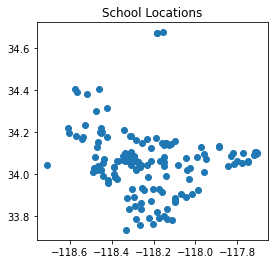

In [17]:
fig, ax = plt.subplots()
gdf.plot(ax=ax)
plt.title("School Locations")
plt.show()

In [18]:
gdf.geometry

1      POINT (-118.26616 34.03422)
2      POINT (-118.45033 34.22008)
3      POINT (-118.15822 33.91555)
4      POINT (-118.09790 34.15886)
5      POINT (-118.09862 33.87113)
                  ...             
156    POINT (-118.34069 34.20923)
157    POINT (-118.30914 34.07882)
158    POINT (-118.22022 33.79099)
159    POINT (-118.34663 34.08529)
160    POINT (-118.44295 33.99290)
Name: geometry, Length: 160, dtype: geometry

In [19]:
gdf = gpd.GeoDataFrame(gdf, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(gdf.X, gdf.Y))

In [20]:
gdf = gdf[gdf.X!=0]

<AxesSubplot:>

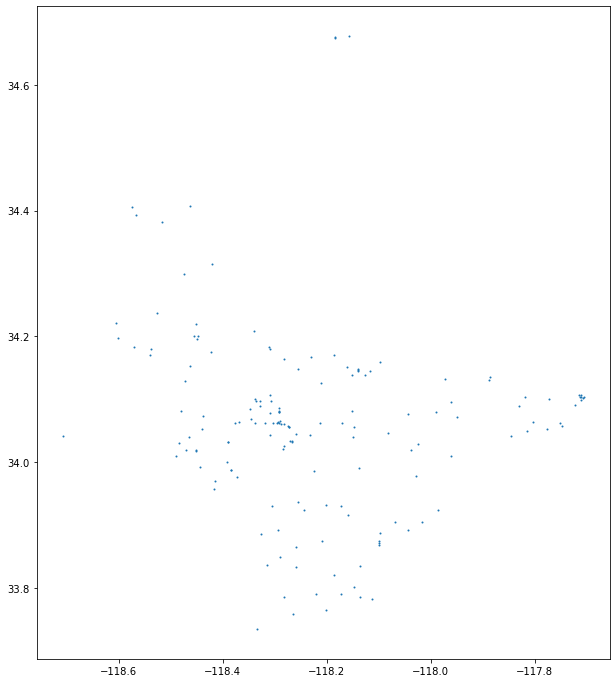

In [21]:
gdf.plot(figsize=(12,12),
             markersize=1)

In [22]:
gdf.sample(10)

,X,Y,field_3,field_4,field_9,Name,SType,field_14,field_15,geometry
47,-118.2915271,34.08139468,12136,HSIP Freedom CollegesUniversities,LA County,Cleveland Chiropractic College Of Los Angeles,Private,Los Angeles,CA,POINT (-118.29153 34.08139)
146,-118.0818601,34.04591097,12027,HSIP Freedom CollegesUniversities,LA County,University Of The West,Private,Rosemead,CA,POINT (-118.08186 34.04591)
147,-118.6060161,34.22199897,12026,HSIP Freedom CollegesUniversities,LA County,Valley College Of Medical Careers,For Profit,West Hills,CA,POINT (-118.60602 34.22200)
79,-118.4547897,34.20085213,12130,HSIP Freedom CollegesUniversities,LA County,King'S College And Seminary,Private,Van Nuys,CA,POINT (-118.45479 34.20085)
154,-117.7477323,34.05809159,12145,HSIP Freedom CollegesUniversities,LA County,Western University Of Health Sciences,Private,Pomona,CA,POINT (-117.74773 34.05809)
87,-118.2121351,34.06215697,12053,HSIP Freedom CollegesUniversities,LA County,Los Angeles County College Of Nursing And Alli...,Public,Los Angeles,CA,POINT (-118.21214 34.06216)
143,-118.4378851,34.07398797,12038,HSIP Freedom CollegesUniversities,LA County,University Of California-Los Angeles,Public,Los Angeles,CA,POINT (-118.43789 34.07399)
49,-118.3446851,34.06888297,11994,HSIP Freedom CollegesUniversities,LA County,Community Based Education And Development Dba ...,Private,Los Angeles,CA,POINT (-118.34469 34.06888)
139,-118.4512536,34.01855645,12152,HSIP Freedom CollegesUniversities,LA County,The Art Institute Of California-Los Angeles,For Profit,Santa Monica,CA,POINT (-118.45125 34.01856)
28,-118.1395921,34.14457297,11986,HSIP Freedom CollegesUniversities,LA County,California School Of Culinary Arts,For Profit,Pasadena,CA,POINT (-118.13959 34.14457)


In [23]:
gdf.rename(columns={'field_3': 'objectid', 'field_4': 'college','field_9':'county','field_14':'city','field_15':'state'}, inplace=True)

In [24]:
gdf.head()

,X,Y,objectid,college,county,Name,SType,city,state,geometry
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,Los Angeles,CA,POINT (-118.26616 34.03422)
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,Van Nuys,CA,POINT (-118.45033 34.22008)
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,South Gate,CA,POINT (-118.15822 33.91555)
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,POINT (-118.09790 34.15886)
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,Cerritos,CA,POINT (-118.09862 33.87113)


In [25]:
SType_count = gdf.SType.value_counts().head(10).index.tolist()
SType_count

['For Profit', 'Private', 'Public']

In [26]:
type_count= gdf['SType'].value_counts()

In [27]:
type_count=type_count.reset_index()
type_count

,index,SType
0,For Profit,65
1,Private,61
2,Public,34


In [28]:
gdf[gdf.SType == 'Private'].head(10)

,X,Y,objectid,college,county,Name,SType,city,state,geometry
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,POINT (-118.09790 34.15886)
7,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,Los Angeles,CA,POINT (-118.30938 34.10712)
9,-118.4717091,34.12925797,12049,HSIP Freedom CollegesUniversities,LA County,American Jewish University,Private,Los Angeles,CA,POINT (-118.47171 34.12926)
14,-118.3846511,33.98763997,11963,HSIP Freedom CollegesUniversities,LA County,Antioch University-Los Angeles Branch,Private,Culver City,CA,POINT (-118.38465 33.98764)
16,-118.1869011,34.17084397,12035,HSIP Freedom CollegesUniversities,LA County,Art Center College Of Design,Private,Pasadena,CA,POINT (-118.18690 34.17084)
19,-117.8879501,34.1308651,12153,HSIP Freedom CollegesUniversities,LA County,Azusa Pacific University,Private,Azusa,CA,POINT (-117.88795 34.13087)
21,-118.0173424,33.90482309,12135,HSIP Freedom CollegesUniversities,LA County,Biola University,Private,La Mirada,CA,POINT (-118.01734 33.90482)
26,-118.1257399,34.1392753,12148,HSIP Freedom CollegesUniversities,LA County,California Institute Of Technology,Private,Pasadena,CA,POINT (-118.12574 34.13928)
27,-118.5673032,34.39333701,12127,HSIP Freedom CollegesUniversities,LA County,California Institute Of The Arts,Private,Valencia,CA,POINT (-118.56730 34.39334)
37,-118.4487061,34.19534297,12039,HSIP Freedom CollegesUniversities,LA County,Casa Loma College-Van Nuys,Private,Van Nuys,CA,POINT (-118.44871 34.19534)


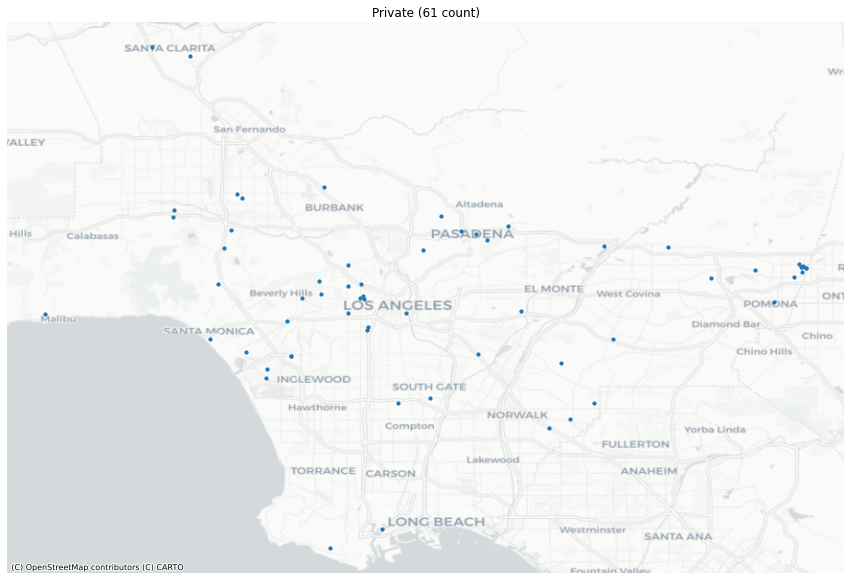

In [29]:
SType = 'Private'

# map
ax = gdf[gdf.SType == SType].plot(figsize=(15,15), markersize=10)

# title (including count)
ax.set_title(SType + ' (' + str(gdf[gdf.SType == SType].shape[0]) + ' count)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [30]:
def SType_by(SType='Public'):
    
    # map
    ax = gdf[gdf.SType == SType].plot(figsize=(9,9), markersize=10)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(SType + ' (' + str(gdf[gdf.SType == SType].shape[0]) + ' count)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

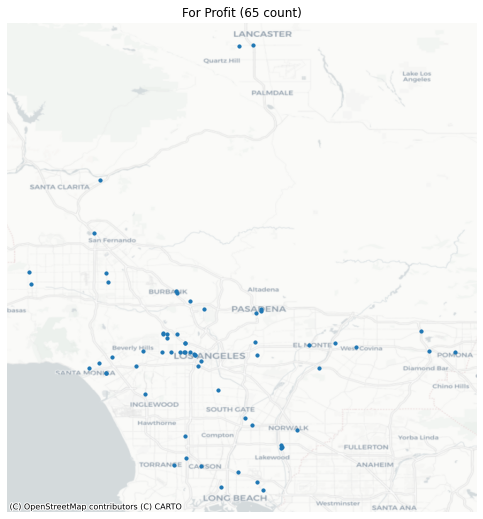

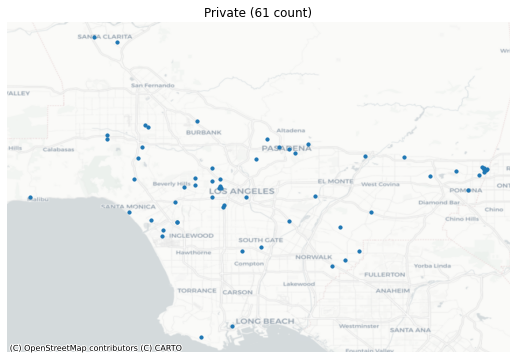

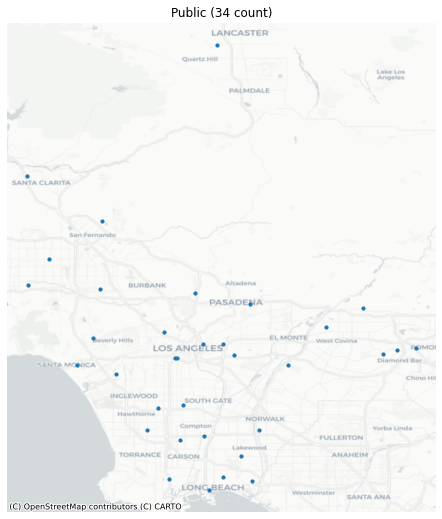

In [31]:
for SType in SType_count:
    SType_by(SType = SType)

In [32]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [33]:
gdf.head()

,X,Y,objectid,college,county,Name,SType,city,state,geometry,x,y
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,Los Angeles,CA,POINT (-118.26616 34.03422),-118.266163,34.034225
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,Van Nuys,CA,POINT (-118.45033 34.22008),-118.450327,34.220083
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,South Gate,CA,POINT (-118.15822 33.91555),-118.158222,33.915552
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,POINT (-118.09790 34.15886),-118.097901,34.158859
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,Cerritos,CA,POINT (-118.09862 33.87113),-118.098622,33.871131


In [34]:
grs= gpd.read_file('GroceryStores.geojson')

In [35]:
list(grs)

['Store_Name',
 'Store_Chain',
 'Street_Number',
 'Street_Name',
 'Additional Address',
 'City',
 'Zip_Code',
 'Latitude',
 'Longitude',
 'geometry']

In [36]:
desired_columns=['Store_Name','Store_Chain','Latitude','Longitude','geometry']

grs_trimmed= grs[desired_columns]

In [37]:
grs_s = grs_trimmed.to_crs(epsg=4326)

In [38]:
join = gpd.sjoin( gdf,grs_s, how='left')
join.head(20)

,X,Y,objectid,college,county,Name,SType,city,state,geometry,x,y,index_right,Store_Name,Store_Chain,Latitude,Longitude
1,-118.2661631,34.03422497,12033,HSIP Freedom CollegesUniversities,LA County,Abram Friedman Occupational Center,Public,Los Angeles,CA,POINT (-118.26616 34.03422),-118.266163,34.034225,NaN,NaN,NaN,NaN,NaN
2,-118.4503272,34.22008342,12109,HSIP Freedom CollegesUniversities,LA County,Adelante Career Institute,For Profit,Van Nuys,CA,POINT (-118.45033 34.22008),-118.450327,34.220083,NaN,NaN,NaN,NaN,NaN
3,-118.1582221,33.91555197,12008,HSIP Freedom CollegesUniversities,LA County,Advanced College,For Profit,South Gate,CA,POINT (-118.15822 33.91555),-118.158222,33.915552,NaN,NaN,NaN,NaN,NaN
4,-118.0979014,34.1588594,12114,HSIP Freedom CollegesUniversities,LA County,American Academy Of Dramatic Arts-West,Private,Los Angeles,CA,POINT (-118.09790 34.15886),-118.097901,34.158859,NaN,NaN,NaN,NaN,NaN
5,-118.0986221,33.87113085,12126,HSIP Freedom CollegesUniversities,LA County,American Auto Institute,For Profit,Cerritos,CA,POINT (-118.09862 33.87113),-118.098622,33.871131,NaN,NaN,NaN,NaN,NaN
6,-118.2922819,34.07923633,12104,HSIP Freedom CollegesUniversities,LA County,American Career College,For Profit,Los Angeles,CA,POINT (-118.29228 34.07924),-118.292282,34.079236,NaN,NaN,NaN,NaN,NaN
7,-118.3093841,34.10712497,12034,HSIP Freedom CollegesUniversities,LA County,American Film Institute Conservatory,Private,Los Angeles,CA,POINT (-118.30938 34.10712),-118.309384,34.107125,NaN,NaN,NaN,NaN,NaN
8,-118.4394365,34.05226361,12095,HSIP Freedom CollegesUniversities,LA County,American Intercontinental University,For Profit,Los Angeles,CA,POINT (-118.43944 34.05226),-118.439436,34.052264,NaN,NaN,NaN,NaN,NaN
9,-118.4717091,34.12925797,12049,HSIP Freedom CollegesUniversities,LA County,American Jewish University,Private,Los Angeles,CA,POINT (-118.47171 34.12926),-118.471709,34.129258,NaN,NaN,NaN,NaN,NaN
10,-118.4476485,34.20142106,12110,HSIP Freedom CollegesUniversities,LA County,American Pacific College,For Profit,Van Nuys,CA,POINT (-118.44765 34.20142),-118.447648,34.201421,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.relplot(data=gdf,
            x='x', 
            y='y',
            s=3, # size of point
            height=8 # size of plot
           )

In [ ]:
sns.set_style('darkgrid')

# scatterplot 
sns.relplot(data=gdf,
            x='x', 
            y='y',
            s=3,
            height=8)

In [ ]:
def sns_styles(style='darkgrid'):
    # seaborn comes with themes to make them prettier
    sns.set_style(style)

    # scatterplot 
    sns.relplot(data=gdf,
                x='x', 
                y='y',
                s=3,
                height=8)

In [ ]:
for style in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    sns_styles(style = style)

In [ ]:
color_list=['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

In [ ]:
sns.relplot(data=gdf,
            x='x', 
            y='y',
            hue='city',
            palette='tab20',
            s=5,
            height=8)

In [ ]:
sns.relplot(data=gdf,
            x='x', 
            y='y',
            hue='SType',
            palette='tab20',
            s=5,
            height=8)

In [ ]:
sns.relplot(data=gdf[gdf['city']=='Los Angeles'],
            x='x', 
            y='y')

In [ ]:
sns.relplot(data=gdf[gdf['city']=='Los Angeles'],
            x='x', 
            y='y',
            hue='SType')

In [ ]:
sns.set_style('white')
g = sns.jointplot(data = gdf,
                  x='x', 
                  y='y',
                  s=10,
                  height=8 
                 )

ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))

hb = ax.hexbin(
    x = gdf['x'], 
    y = gdf['y'],
    gridsize=50, 
    linewidths=1,
    alpha=0.5, 
    mincnt=1, 
    cmap='viridis'
)


ctx.add_basemap(
    ax, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)


plt.colorbar(hb)


ax.axis('off')

In [ ]:
gdf_SType = gdf[gdf.SType.isin(['Private','Public','For Profit'])]

In [ ]:
g = sns.jointplot(data = gdf_SType,
                  x='x', 
                  y='y',
                  hue='SType',
                  s=10,
                  height=15 
                 )

g.ax_joint.set_axis_off()


ctx.add_basemap(g.ax_joint,
                crs='epsg:4326')